In [77]:
import pandas as pd
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [78]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeromecohen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeromecohen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
training_df = pd.read_csv('training_set.csv', encoding='ISO-8859-1')

# EDA 

In [80]:
training_df.head(10)

,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...
5,322444,36955156,2019-05-21 14:02:32 EDT,Photo,Congrats to the 2018-19 NBA All-Rookie First T...
6,722540,36955156,2019-05-21 12:30:53 EDT,Video,The @warriors locked in for four games to adva...
7,339265,36955156,2019-05-21 08:59:02 EDT,Photo,Will the @bucks take a commanding 3-1 lead... ...
8,443330,36955156,2019-05-21 00:48:16 EDT,Photo,TAP to SHOP the @warriors Western Conference C...
9,652193,36955156,2019-05-21 00:38:18 EDT,Video,Hey @stephencurry30... that was the first time...


In [81]:
training_df.dtypes

Engagements              int64
Followers at Posting     int64
Created                 object
Type                    object
Description             object
dtype: object

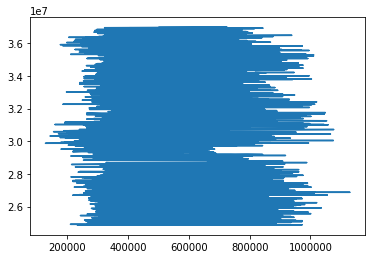

In [82]:
x, y = training_df['Engagements'], training_df['Followers at Posting']
plt.plot(x, y)
plt.show()

# Cleaning

In [83]:
print(len(training_df))
training_df.dropna(inplace=True)
print(len(training_df))

7766
7752


In [84]:
training_df['Created'] = pd.to_datetime(training_df['Created'])

In [85]:
def clean_desription(x): 
    english_stopwords = stopwords.words('english')
    tokenized = nltk.word_tokenize(x)
    
    description = []
    for token in tokenized: 
        if token not in english_stopwords: 
            description.append(token)
            
    
    return description

In [86]:
training_df['description_clean'] = training_df['Description'].apply(lambda x : clean_desription(x))

In [87]:
training_df.head(10)

,Engagements,Followers at Posting,Created,Type,Description,description_clean
0,502093,36984682,2019-05-21 23:30:51-04:00,Video,The @raptors bench trio of @sergeibaka @norman...,"[The, @, raptors, bench, trio, @, sergeibaka, ..."
1,603380,36984682,2019-05-21 22:53:33-04:00,Video,@kyle_lowry7 pulls from deep for the @raptors ...,"[@, kyle_lowry7, pulls, deep, @, raptors, 4th,..."
2,603380,36984682,2019-05-21 22:19:58-04:00,Video,@k_mid22 with some english on the @bucks dime!,"[@, k_mid22, english, @, bucks, dime, !]"
3,725100,36984682,2019-05-21 22:02:41-04:00,Video,Kawhi punches it home with the left on TNT!,"[Kawhi, punches, home, left, TNT, !]"
4,661446,36984682,2019-05-21 20:47:49-04:00,Video,@giannis_an34 goes baseline early to rock the ...,"[@, giannis_an34, goes, baseline, early, rock,..."
5,322444,36955156,2019-05-21 14:02:32-04:00,Photo,Congrats to the 2018-19 NBA All-Rookie First T...,"[Congrats, 2018-19, NBA, All-Rookie, First, Te..."
6,722540,36955156,2019-05-21 12:30:53-04:00,Video,The @warriors locked in for four games to adva...,"[The, @, warriors, locked, four, games, advanc..."
7,339265,36955156,2019-05-21 08:59:02-04:00,Photo,Will the @bucks take a commanding 3-1 lead... ...,"[Will, @, bucks, take, commanding, 3-1, lead, ..."
8,443330,36955156,2019-05-21 00:48:16-04:00,Photo,TAP to SHOP the @warriors Western Conference C...,"[TAP, SHOP, @, warriors, Western, Conference, ..."
9,652193,36955156,2019-05-21 00:38:18-04:00,Video,Hey @stephencurry30... that was the first time...,"[Hey, @, stephencurry30, ..., first, time, tea..."


# Back to EDA

In [88]:
training_df.dtypes

Engagements                                 int64
Followers at Posting                        int64
Created                 datetime64[ns, tzlocal()]
Type                                       object
Description                                object
description_clean                          object
dtype: object

In [97]:
year_df = training_df.groupby(training_df['Created'].dt.year).mean().reset_index()
month_df = training_df.groupby(training_df['Created'].dt.month).mean().reset_index()
day_df = training_df.groupby(training_df['Created'].dt.day).mean().reset_index()
dayofweek_df = training_df.groupby(training_df['Created'].dt.dayofweek).mean().reset_index()

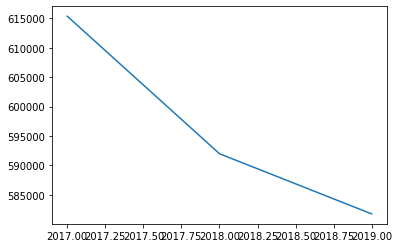

In [93]:
x, y = year_df['Created'], year_df['Engagements']
plt.plot(x, y)
plt.show()

Below we see a large see much seasonality, most of which can be attributed to the NBA season / offseason. 

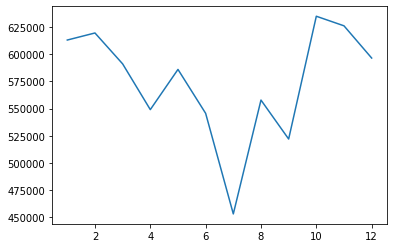

In [94]:
x, y = month_df['Created'], month_df['Engagements']
plt.plot(x, y)
plt.show()

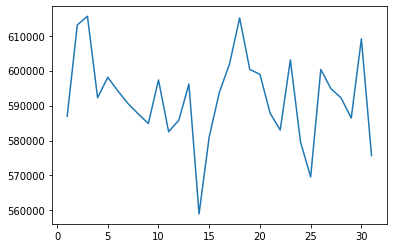

In [95]:
x, y = day_df['Created'], day_df['Engagements']
plt.plot(x, y)
plt.show()

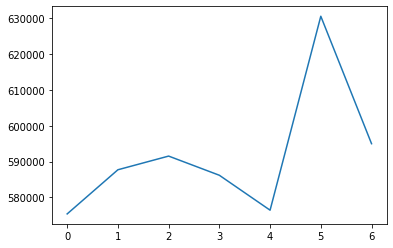

In [98]:
x, y = dayofweek_df['Created'], dayofweek_df['Engagements']
plt.plot(x, y)
plt.show()